In [25]:
#import cell, for all the libraries required in this notebook
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings     #To make sure k is not even, and lesser than number of dimensions
from math import sqrt

style.use('fivethirtyeight')


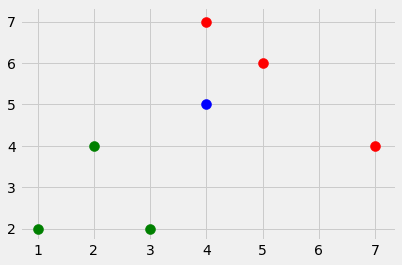

In [26]:
#Just a cell to see the datasets and the other features
#Just to build the intuition for how euclidean works

dataset = {'g':[[1,2], [3,2], [2,4]], 
          'r': [[5,6], [7,4], [4,7]],}
random_features = [4,5]
[[plt.scatter(j[0], j[1], s=100, color= i) for j in dataset[i]] for i in dataset]
plt.scatter(random_features[0], random_features[1], s=100, color = 'b')
plt.show()

In [27]:
#cell for defining the kNN algorithm

def kNN(data, predict, k = 3):
    if len(data)>=k:
        warnings.warn("Change the value of k as voting groups are greater than value of K!!!")
    
    dist = []
    for i in data:
        for j in data[i]:
            d = np.linalg.norm(np.array(j)- np.array(predict))   #Numpy function for calculating Euclidean Dist
            # print(d)
            dist.append([d, i])
    votes = [i[1] for i in sorted(dist)[:k]]
    
    return Counter(votes).most_common(1)[0][0]

vote = kNN(dataset, random_features, k = 3)
print(vote)

r


In [30]:
#Cell where we will add make our kNN with respect to Breast Cancer Dataframe

df = pd.read_csv("datasets/BreastCancer/breast-cancer-wisconsin.data")
df.replace('?', -99999, inplace = True)
df.drop(columns=['id'], inplace = True)
full_data = df.astype(float).values.tolist()  #Converting to float because the column with "?" was a string column
train = {2: [], 4: []}
test = {2: [], 4: []}
random.shuffle(full_data)  # Shuffling the list to remove order  
X_train = full_data[:-int(0.1*len(full_data))]
X_test = full_data[-int(0.1*len(full_data)):]
for i in X_train:
    train[i[-1]].append(i[:-1])
for i in X_test:
    test[i[-1]].append(i[:-1])
correct, total = 0,0
for i in test:
    for j in test[i]:
        votes = kNN(train, j, k=5)
        if votes == i:
            correct += 1
        total +=1

print("Accuracy", correct/total)

Accuracy 0.9855072463768116
